<a href="https://www.kaggle.com/code/mrafraim/dl-day-9-gradient-derivative-intuition?scriptVersionId=286508638" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Day 9: Gradient & Derivative Intuition

Today you will learn:
- What a derivative really means
- Why gradients matter in deep learning
- How calculus connects to loss minimization
- Small numeric examples
- Visual intuition (not memorization)

This is the foundation of backpropagation.

---


# What Is a Derivative?

The derivative answers one question:

> If I slightly change $x$, how much does $y$ change?

Mathematically:
$$
\frac{dy}{dx}
$$

Interpretation:
- Positive → increasing
- Negative → decreasing
- Zero → flat (minimum or maximum)


# Example 1: Simple Function

Given:
$$
y = x^2
$$

Derivative:
$$
\frac{dy}{dx} = 2x
$$

Meaning:
- At $x=1$, slope = 2
- At $x=0$, slope = 0 (minimum)
- At $x=-2$, slope = -4


# Function & Derivative Visualization

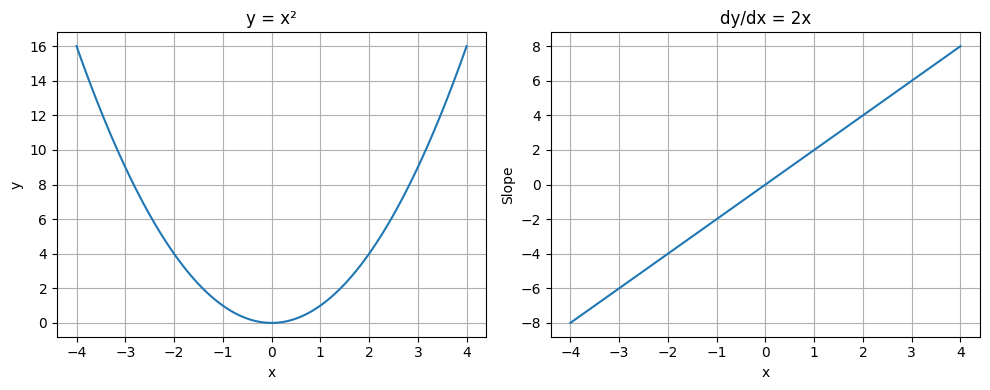

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 100)
y = x**2
dy_dx = 2*x

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x, y)
plt.title("y = x²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x, dy_dx)
plt.title("dy/dx = 2x")
plt.xlabel("x")
plt.ylabel("Slope")
plt.grid(True)

plt.tight_layout()
plt.show()


# Derivative in Deep Learning Context

In training, loss is a function of weight:
$$
L(w)
$$

Derivative (gradient):
$$
\frac{dL}{dw}
$$

Meaning:
- Large derivative → steep slope → big update
- Small derivative → flat → small update
- Zero → minimum loss


# Why Do We Need Gradients?

In deep learning, our goal is simple:

> Minimize the loss by adjusting weights.

Loss depends on weights:
$$
L = f(w)
$$

To reduce loss, we need to know:
- Which direction to move the weight?
- How much to move?

That information comes from the **gradient**.

# Example 2: Loss Function (Mean Squared Error)

We consider a single neuron with:
- Input: $x$
- Weight: $w$
- Target output: $y$

The neuron prediction is:

$$
\hat{y} = wx
$$

For one data point, the loss is defined as:

$$
L = (wx - y)^2
$$

**What this means:**
- Measures how far the prediction $wx$ is from the true value $y$
- Squaring ensures:
  - Loss is always non-negative
  - Larger errors are penalized more heavily


To minimize the loss, we compute the gradient:

$$
\frac{dL}{dw}
$$

Apply the chain rule:

- Outer derivative:
$$
\frac{d}{d(wx - y)} (wx - y)^2 = 2(wx - y)
$$

- Inner derivative:
$$
\frac{d}{dw}(wx - y) = x
$$

Multiply both:

$$
\frac{dL}{dw} = 2(wx - y)x
$$


The gradient provides two critical pieces of information:

- **Direction**  
  - If $wx > y$ → gradient is positive → decrease $w$
  - If $wx < y$ → gradient is negative → increase $w$

- **Magnitude**  
  - Larger error → larger gradient → bigger update
  - Smaller error → smaller gradient → finer adjustment


Using learning rate $\eta$:

$$
w := w - \eta \frac{dL}{dw}
$$

This update moves the weight in the direction that reduces the loss.


### Key Insight

> The gradient not only tells us which way to move the weight, but also how strongly to move it, enabling efficient learning through gradient descent.


# Loss vs Weight Curve

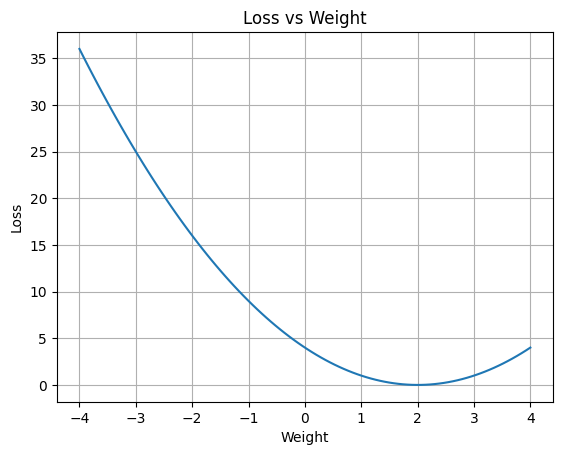

In [2]:
x = 1
y_true = 2

weights = np.linspace(-4, 4, 100)
losses = [(w*x - y_true)**2 for w in weights]

plt.figure()
plt.plot(weights, losses)
plt.xlabel("Weight")
plt.ylabel("Loss")
plt.title("Loss vs Weight")
plt.grid(True)
plt.show()

This curve shows how the loss changes with the weight and why gradient descent works: the slope always points toward the weight value that minimizes the loss.

# Gradient Descent Steps on Loss Curve

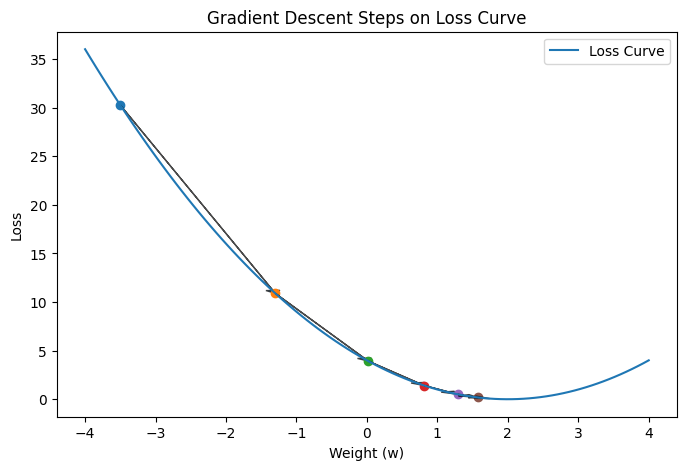

In [3]:
# Data
x = 1
y_true = 2

weights = np.linspace(-4, 4, 100)
losses = (weights * x - y_true) ** 2

# Gradient Descent simulation
w = -3.5
lr = 0.2
steps = []

for _ in range(6):
    loss = (w * x - y_true) ** 2
    grad = 2 * (w * x - y_true) * x
    steps.append((w, loss, grad))
    w = w - lr * grad

# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(weights, losses, label="Loss Curve")

# Plot gradient descent steps
for i, (w_i, l_i, g_i) in enumerate(steps):
    plt.scatter(w_i, l_i)
    plt.arrow(
        w_i,
        l_i,
        -lr * g_i,
        ( (w_i - lr * g_i) * x - y_true )**2 - l_i,
        head_width=0.2,
        length_includes_head=True,
        alpha=0.7
    )

plt.xlabel("Weight (w)")
plt.ylabel("Loss")
plt.title("Gradient Descent Steps on Loss Curve")
plt.legend()
plt.grid(False)
plt.show()


### Blue curve = **Loss landscape**

* This is the function
  $$
  L(w) = (wx - y)^2
  $$
* Every point on the curve answers:
  **“If the weight were (w), how bad would the model be?”**
* The lowest point of the curve is the global minimum.


### Dots = **Actual gradient descent steps**

* Each dot is one iteration:

  * current weight (w)
  * corresponding loss
* You can literally see the optimizer **walking downhill**.


### Arrows = **Gradient direction**

* Arrow direction = **negative gradient**
* Arrow length = **learning rate × gradient magnitude**

This is critical:

* Far from the minimum → steep slope → **big arrows**
* Near the minimum → flat slope → **small arrows**

That’s why learning slows near convergence.

### Why it always moves toward the minimum

* Left of minimum:

  * slope is negative
  * gradient descent moves right
* Right of minimum:

  * slope is positive
  * gradient descent moves left

So updates always point **toward lower loss**.

### This is convergence (important)

> Convergence happens when the curve becomes flat and updates become tiny, not when loss is exactly zero.

That’s exactly what you see:

* Steps get shorter
* Loss stops decreasing meaningfully
* Parameters stabilize

**In short:** This plot shows how gradient descent uses the slope of the loss curve to iteratively update the weight, taking large steps when far from the minimum and smaller steps as it converges to the optimal value.

### Reality check

This is a **1D, convex** problem.

* Deep learning = **millions of dimensions**
* Same principle, just harder terrain

If this picture is clear, backprop, optimizers, and training loops will all make sense.

# Gradient Descent on a Non-Convex Loss Landscape

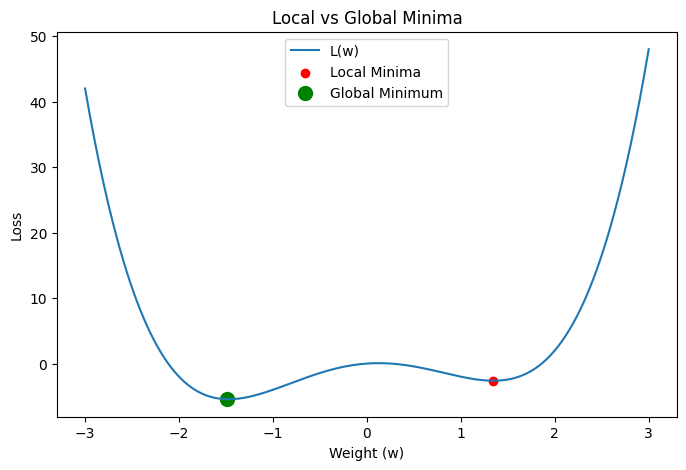

In [4]:
# Define non-convex loss function
def L(w):
    return w**4 - 4*w**2 + w

# Weight range
w = np.linspace(-3, 3, 500)
loss = L(w)


# Numerical gradient
grad = np.gradient(loss, w)

# Approximate minima where gradient changes sign
min_indices = np.where(np.diff(np.sign(grad)) > 0)[0]

min_w = w[min_indices]
min_loss = loss[min_indices]

# Plot again with minima
plt.figure(figsize=(8,5))
plt.plot(w, loss, label="L(w)")
plt.scatter(min_w, min_loss, color="red", label="Local Minima")

# Global minimum
global_idx = np.argmin(min_loss)
plt.scatter(min_w[global_idx], min_loss[global_idx],
            color="green", s=100, label="Global Minimum")

plt.xlabel("Weight (w)")
plt.ylabel("Loss")
plt.title("Local vs Global Minima")
plt.legend()
plt.grid(False)
plt.show()


This plot shows a loss function $L(w)$ with multiple minima, which is common in real machine-learning models (especially deep learning).

### What the curve represents
- **x-axis ($w$)** → model parameter (weight)
- **y-axis ($L(w)$)** → loss value
- The curve is non-convex, meaning it has more than one minimum

#### 🔴 Red points → Local Minima
- These are points where the gradient changes sign  
  $$
  \frac{dL}{dw} \approx 0
  $$
- Gradient Descent stops updating here because:
  - slope is near zero
  - no downhill direction is detected
- These points are not necessarily optimal


#### 🟢 Green point → Global Minimum
- The lowest loss among all minima
- This is the best possible solution
- Reaching this point gives the minimum achievable error

### How Gradient Descent behaves on this landscape
Gradient Descent updates weights as:
$$
w := w - \eta \frac{dL}{dw}
$$

- The algorithm moves downhill along the slope
- It converges to the nearest minimum
- The final solution depends on:
  - initial value of $w$
  - learning rate $\eta$

### Key Insight
> Gradient Descent does not guarantee reaching the global minimum in non-convex loss functions, it converges to the closest local minimum.

This is why:
- weight initialization matters
- advanced optimizers (Momentum, Adam, etc.) are used
- Deep learning optimization is challenging


# Analytical vs Numerical Gradients

Gradients tell us how a loss changes when a parameter changes.  
There are two ways to compute them:

### 1️. Analytical Gradient (Exact, Formula-Based)

**Definition**

An analytical gradient is computed using calculus (derivatives).

It is:
- exact
- fast
- used during real training

**Example: Loss Function**

Single-parameter loss:
$$
L(w) = (wx - y)^2
$$

Analytical derivative w.r.t. $w$
Using chain rule:
$$
\frac{dL}{dw}
= 2(wx - y)\cdot x
$$

This tells us:
- direction to update $w$
- magnitude of the update

**Why this matters**

Gradient Descent update:
$$
w := w - \eta \frac{dL}{dw}
$$

Analytical gradients make training:
- accurate
- stable
- computationally efficient


### 2. Numerical Gradient (Approximation-Based)

**Definition**

A numerical gradient estimates the gradient using finite differences.

Forward difference approximation:
$$
\frac{dL}{dw} \approx \frac{L(w + \epsilon) - L(w)}{\epsilon}
$$

Central difference (more accurate):
$$
\frac{dL}{dw} \approx \frac{L(w + \epsilon) - L(w - \epsilon)}{2\epsilon}
$$

Where:
- $\epsilon$ is a very small number (e.g., $10^{-5}$)

**Properties**

- approximate, not exact
- slow
- sensitive to $\epsilon$
- **not used in training**

**Used mainly for:**

- debugging
- gradient checking

In [5]:
# Data
x = 2.0
y = 4.0
w = 1.5
epsilon = 1e-5

# Loss function
def loss(w):
    return (w*x - y)**2

# Analytical gradient
grad_analytical = 2 * (w*x - y) * x

# Numerical gradient (central difference)
grad_numerical = (loss(w + epsilon) - loss(w - epsilon)) / (2 * epsilon)

print("Analytical gradient:", grad_analytical)
print("Numerical gradient :", grad_numerical)

Analytical gradient: -4.0
Numerical gradient : -4.000000000026205


**Interpretation:**
- Both gradients should be almost identical
- Small differences come from numerical precision
- If they differ significantly → bug in backprop

# Key Takeaways from Day 9 

- A derivative measures sensitivity: how much the output changes when the input changes.
- In deep learning, loss is a function of parameters:
  $$
  L = f(w)
  $$

- The **gradient** $\frac{dL}{dw}$ tells:
  - Direction to move the weight
  - How strongly the loss reacts to that weight

- Zero gradient means:
  - Flat region
  - Possible minimum (or maximum)
- Gradient Descent update rule:
  $$
  w_{new} = w - \alpha \frac{dL}{dw}
  $$
  where $\alpha$ controls step size.
- Gradients point **uphill**; learning moves **downhill**.
- Analytical gradients (formulas) and numerical gradients (approximations) should closely match, this validates correctness.
- Every training algorithm in deep learning is ultimately:
  > Forward pass → Loss → Gradient → Update
---

<p style="text-align:center; font-size:18px;">
© 2025 Mostafizur Rahman
</p>
